In [4]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("darkgrid")
GLyearEBC = pd.read_csv('../queries_results/USA inner/USA year inner eventBC count.csv', header = 0,sep=' *, *')
eventcodes = pd.read_csv('../../cameo.csv', header = 0,dtype =str, sep=' *, *')
GLyearEBC = GLyearEBC.merge(eventcodes.set_index('CAMEOEVENTCODE'), left_on='EventBaseCode',right_on='CAMEOEVENTCODE', how='left')

/home/micha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/home/micha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [5]:
# GLyearEBC

/home/micha/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


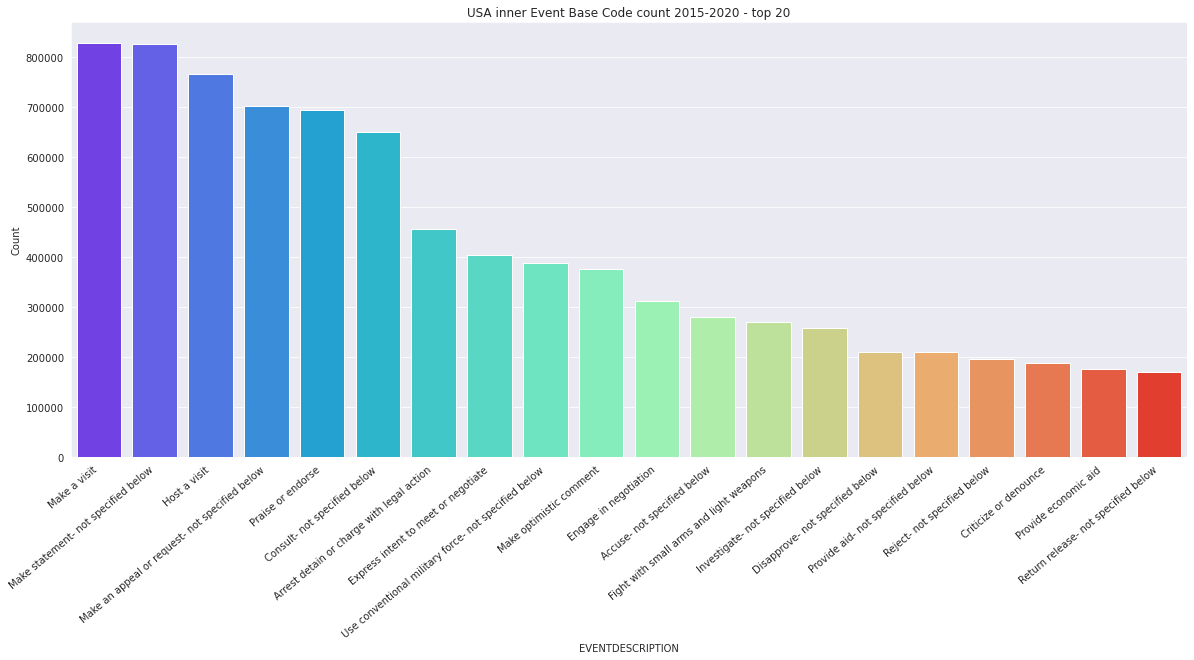

In [6]:
n = 20
s = GLyearEBC.groupby("EVENTDESCRIPTION", as_index=False).sum().sort_values(by="Count", ascending=False).head(n)
g = sns.barplot(s.EVENTDESCRIPTION, s.Count, palette='rainbow')
g.set_title("USA inner Event Base Code count 2015-2020 - top {}".format(n))
g.set(ylabel='Count')
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
g.figure.set_size_inches(20,8)
plt.savefig('../../src/fig/USA inner/EBC.png', bbox_inches='tight')

In [7]:
# s

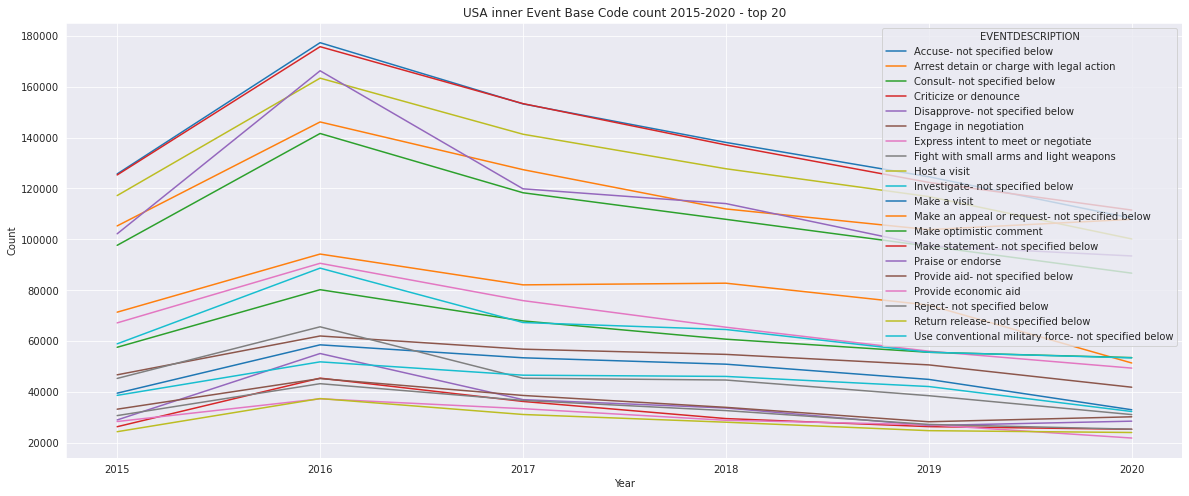

In [8]:
n=20
cols = GLyearEBC.groupby("EVENTDESCRIPTION", as_index=False).sum().sort_values(by="Count", ascending=False).head(n)['EVENTDESCRIPTION']
s  = GLyearEBC.loc[GLyearEBC["EVENTDESCRIPTION"].isin(cols)]

s = s.groupby(["Year","EVENTDESCRIPTION"]).agg({'Count':'sum'})
g = s.unstack().plot(y='Count')
g.set(ylabel='Count')
g.set_title("USA inner Event Base Code count 2015-2020 - top {}".format(n))
g.figure.set_size_inches(20,8)
plt.savefig('../../src/fig/USA inner/EBCtime.png', bbox_inches='tight')


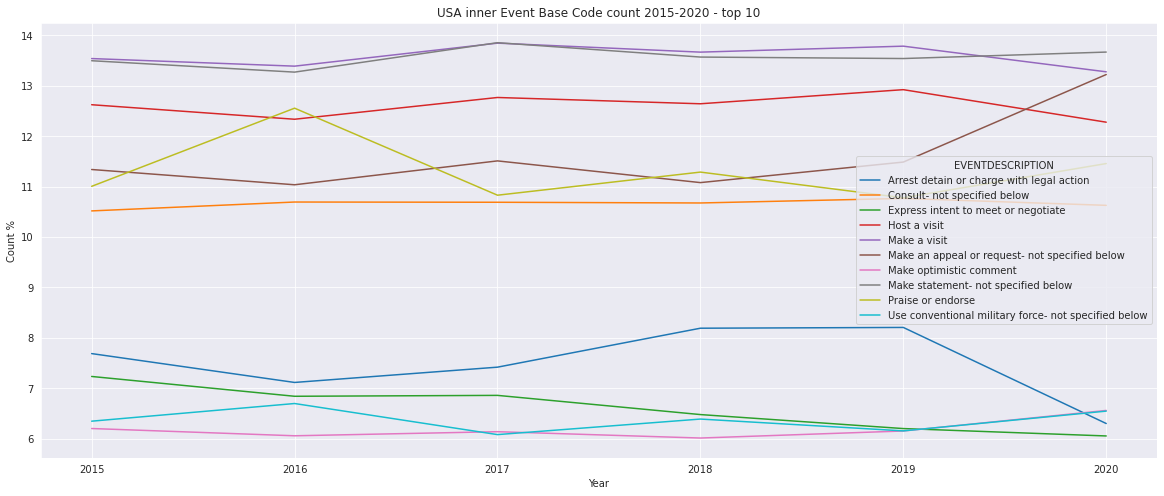

In [9]:
n=10
cols = GLyearEBC.groupby("EVENTDESCRIPTION", as_index=False).sum().sort_values(by="Count", ascending=False).head(n)['EVENTDESCRIPTION']
s  = GLyearEBC.loc[GLyearEBC["EVENTDESCRIPTION"].isin(cols)]

s = s.groupby(["Year","EVENTDESCRIPTION"]).agg({'Count':'sum'}).sort_values(by=["Year", "Count"], ascending=False)

s['%']= s.groupby(level=0).apply(lambda x:  100*x / x.sum())

g = s.unstack().plot(y='%')
g.set(ylabel='Count %')
g.set_title("USA inner Event Base Code count 2015-2020 - top {}".format(n))
g.figure.set_size_inches(20,8)
plt.savefig('../../src/fig/USA inner/EBCperc.png', bbox_inches='tight')

In [10]:
# s